<a href="https://colab.research.google.com/github/Zeruel308/PDI/blob/main/Logica_diffusa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 pip install -U scikit-fuzzy

     |████████████████████████████████| 993 kB 5.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=5432a1c16f7a67590a4da6976af225b5c1004bbe6337fe013c373e71b72bdafc
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


Genero 
 1: Mujer
 2:Hombre
2
Peso en kg
80
Cuantos dias a la semana cosumes alcohol, drogas o fumas
0
¿Cuántas calorias consumes al día?
2000
Deberias consumir: 2000.0
0.7733333333333333


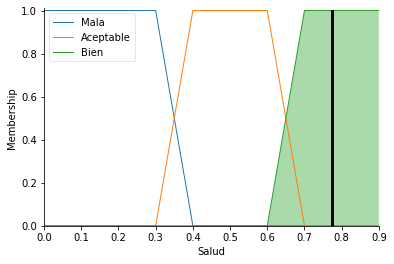

In [7]:
import numpy as np
import skfuzzy as sk
from skfuzzy import control as ctrl
genero=int(input("Genero \n 1: Mujer\n 2:Hombre\n"))
peso=float(input("Peso en kg\n"))
HabitosMalosAlDia=int(input("Cuantos dias a la semana cosumes alcohol, drogas o fumas\n"))%8

consume=float(input("¿Cuántas calorias consumes al día?\n"))

'''
Formula para calcular la cantidad de 
CALORIAS APROXIMADAS PARA UNA PERSONA ADULTA
solo se ocupa el genero y el peso

'''

if(genero==1): # si es mujer
  calorias=peso*23
else:#Si es hombre
  calorias=peso*25
print("Deberias consumir:",calorias)

#Entradas
# valores entre 0 y 7 que es la frecuencia por dias a la semana
Habitos=ctrl.Antecedent(np.arange(0,8, 1),'Habitos')
# valores entre 0 y el doble de calorias recomendadas, que eso ya seria comer mucho
Alimentacion = ctrl.Antecedent(np.arange(0,calorias*2, 0.1),'Calorias')

#variables linguisticas son poco, bien y mucho
"""
   Cantidad de calorias buena se toma como el punto medio es decir
   es bien alimentado
   de 0 a 40% es poco y tiene probabilidad de estar bien (por la incertidumbre)
   de 30% a 70% es bien y tiene probabilidad de ser poco o mucho
   de 60% a 100% es bien y tiene probabilidad de ser mucho   
"""
#Grado de pertenencia
Alimentacion['Poco'] = sk.trapmf(Alimentacion.universe, [0, 0,calorias*.8, calorias])
Alimentacion['Bien'] = sk.trimf(Alimentacion.universe, [calorias*.8, calorias, calorias*1.2])
Alimentacion['Mucho'] = sk.trapmf(Alimentacion.universe, [calorias, calorias*1.2, calorias*2, calorias*2])

"""
  Se clasificam como bueno, regular o malo
  dependiendo de cuantos dias a la semana lo hace
  0-2 dias es bueno y hay probabilidad de que sea regular (por la incertidumbre)
  1-5 dias es regular y tiene probabilidad de ser bueno o malo
  3 a 7 dias es malo y tiene probabilidad de ser regular 
"""
#variables linguisticas son Bueno, Regular, Malo
Habitos['Bueno'] = sk.trapmf(Habitos.universe, [0, 0,1,2])
Habitos['Regular'] = sk.trapmf(Habitos.universe, [1, 2,3,5])
Habitos['Malo'] = sk.trapmf(Habitos.universe, [3, 5,7,7])

#Salida
Salud = ctrl.Consequent(np.arange(0, 1, 0.1), 'Salud')

Salud['Mala'] = sk.trapmf(Salud.universe, [0.0, 0.0, 0.3, 0.4])
Salud['Aceptable'] = sk.trapmf(Salud.universe, [0.3, 0.4, 0.6, 0.7])
Salud['Bien'] = sk.trapmf(Salud.universe, [0.6, 0.7, 1.0, 1.0])
#reglas
'''
                 |          Habitos  
                 |   [Bueno]     [ Regular]  [Malo]
                 |
        ---------|------------------------------------   
consumo  [Poco ] |   [Aceptable] [ Mala   ]  [Mala]
  de     [Bien ] |   [Bien ]     [Aceptable] [Mala]
calorias [Mucho] |   [Aceptable] [Aceptable] [Mala]

'''
regla1=ctrl.Rule((Alimentacion['Poco'] & Habitos["Bueno"]), Salud['Aceptable'])
regla2=ctrl.Rule((Alimentacion['Poco'] & Habitos["Regular"]), Salud['Mala'])
regla3=ctrl.Rule((Alimentacion['Poco'] & Habitos["Malo"]), Salud['Mala'])
regla4=ctrl.Rule((Alimentacion['Bien'] & Habitos["Bueno"]), Salud['Bien'])
regla5=ctrl.Rule((Alimentacion['Bien'] & Habitos["Regular"]), Salud['Aceptable'])
regla6=ctrl.Rule((Alimentacion['Bien'] & Habitos["Malo"]), Salud['Mala'])
regla7=ctrl.Rule((Alimentacion['Mucho'] & Habitos["Bueno"]), Salud['Aceptable'])
regla8=ctrl.Rule((Alimentacion['Mucho'] & Habitos["Regular"]), Salud['Aceptable'])
regla9=ctrl.Rule((Alimentacion['Mucho'] & Habitos["Malo"]), Salud['Mala'])

#computo de la salida
green_ctrl = ctrl.ControlSystem([regla1, regla2, regla3,regla4, regla5, regla6,regla7, regla8, regla9])
green = ctrl.ControlSystemSimulation(green_ctrl)
green.input['Calorias'] = consume
green.input['Habitos'] = HabitosMalosAlDia
green = ctrl.ControlSystemSimulation(green_ctrl)

green.compute()
# indica el valor de la salud
# con ese sabes si es buena,aceptable o mala

print(green.output['Salud'])
Salud.view(sim=green)

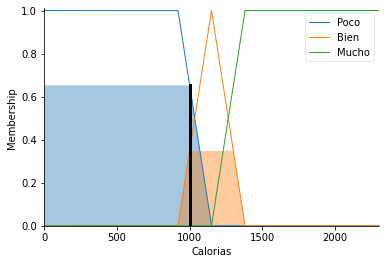

In [ ]:

Alimentacion.view()


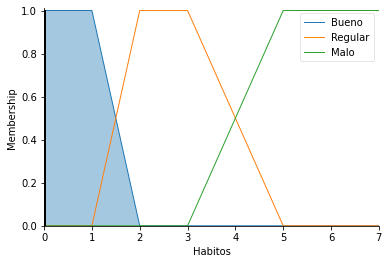

In [ ]:
Habitos.view()


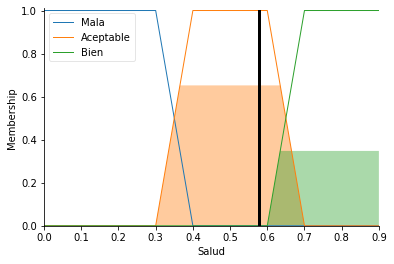

In [ ]:
Salud.view()